# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

##Imporing Datasets

In [ ]:
df_train = pd.read_excel('FCGR_Train.xlsx')
df_test =  pd.read_excel('FCGR_Test.xlsx')

###Appending both the datasets

In [ ]:
df = df_train.append(df_test)
df

,Post Processing,Built Orientation,SIF,Crack Growth Rate
0,Stress Relieved,XY,12.5,3.970000e-08
1,Stress Relieved,XY,15.5,8.530000e-08
2,Stress Relieved,XY,16.3,1.570000e-07
3,Stress Relieved,XY,17.1,1.350000e-07
4,Stress Relieved,XY,17.5,1.570000e-07
...,...,...,...,...
29,As Built,ZX,17.9,3.340000e-07
30,Heat Treated,ZX,23.0,1.650000e-07
31,As Built,XY,18.7,2.010000e-07
32,Stress Relieved,ZX,34.2,4.740000e-06


####Plotting the Data 

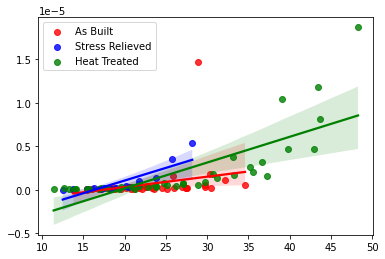

In [ ]:
Data_X = df[(df['Post Processing'] == 'As Built') & (df['Built Orientation'] == 'XY')]['SIF'].values
Data_X1 = df[(df['Post Processing'] == 'Stress Relieved') & (df['Built Orientation'] == 'XY')]['SIF'].values
Data_X2 = df[(df['Post Processing'] == 'Heat Treated') & (df['Built Orientation'] == 'XY')]['SIF'].values
Data_Y = df[(df['Post Processing'] == 'As Built') & (df['Built Orientation'] == 'XY')]['Crack Growth Rate'].values
Data_Y1 = df[(df['Post Processing'] == 'Stress Relieved') & (df['Built Orientation'] == 'XY')]['Crack Growth Rate'].values
Data_Y2 = df[(df['Post Processing'] == 'Heat Treated') & (df['Built Orientation'] == 'XY')]['Crack Growth Rate'].values
import matplotlib.pyplot as plt
sns.regplot(Data_X,Data_Y,color= 'r',label = 'As Built')
sns.regplot(Data_X1,Data_Y1,color= 'b',label = 'Stress Relieved')
sns.regplot(Data_X2,Data_Y2,color= 'g',label = 'Heat Treated')
plt.legend()

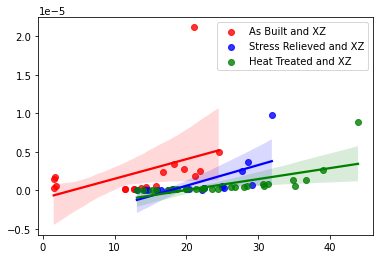

In [ ]:
Data_X10 = df[(df['Post Processing'] == 'As Built') & (df['Built Orientation'] == 'XZ')]['SIF'].values
Data_X11 = df[(df['Post Processing'] == 'Stress Relieved') & (df['Built Orientation'] == 'XZ')]['SIF'].values
Data_X21 = df[(df['Post Processing'] == 'Heat Treated') & (df['Built Orientation'] == 'XZ')]['SIF'].values
Data_Y10 = df[(df['Post Processing'] == 'As Built') & (df['Built Orientation'] == 'XZ')]['Crack Growth Rate'].values
Data_Y11 = df[(df['Post Processing'] == 'Stress Relieved') & (df['Built Orientation'] == 'XZ')]['Crack Growth Rate'].values
Data_Y21 = df[(df['Post Processing'] == 'Heat Treated') & (df['Built Orientation'] == 'XZ')]['Crack Growth Rate'].values
import matplotlib.pyplot as plt
sns.regplot(Data_X10,Data_Y10,color= 'r',label = 'As Built and XZ')
sns.regplot(Data_X11,Data_Y11,color= 'b',label = 'Stress Relieved and XZ')
sns.regplot(Data_X21,Data_Y21,color= 'g',label = 'Heat Treated and XZ')
plt.legend()

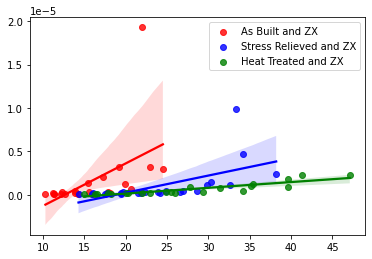

In [ ]:
Data_X100 = df[(df['Post Processing'] == 'As Built') & (df['Built Orientation'] == 'ZX')]['SIF'].values
Data_X111 = df[(df['Post Processing'] == 'Stress Relieved') & (df['Built Orientation'] == 'ZX')]['SIF'].values
Data_X211 = df[(df['Post Processing'] == 'Heat Treated') & (df['Built Orientation'] == 'ZX')]['SIF'].values
Data_Y100 = df[(df['Post Processing'] == 'As Built') & (df['Built Orientation'] == 'ZX')]['Crack Growth Rate'].values
Data_Y111 = df[(df['Post Processing'] == 'Stress Relieved') & (df['Built Orientation'] == 'ZX')]['Crack Growth Rate'].values
Data_Y211 = df[(df['Post Processing'] == 'Heat Treated') & (df['Built Orientation'] == 'ZX')]['Crack Growth Rate'].values
import matplotlib.pyplot as plt
sns.regplot(Data_X100,Data_Y100,color= 'r',label = 'As Built and ZX')
sns.regplot(Data_X111,Data_Y111,color= 'b',label = 'Stress Relieved and ZX')
sns.regplot(Data_X211,Data_Y211,color= 'g',label = 'Heat Treated and ZX')
plt.legend()

1. Identifying the datatypes of the columns.
2. Encoding the Categorical columns.

In [ ]:
df_train['Post Processing'] = df_train['Post Processing'].astype('category')
df_train['Post Processing'] = df_train['Post Processing'].cat.codes
df_test['Post Processing'] = df_test['Post Processing'].astype('category')
df_test['Post Processing'] = df_test['Post Processing'].cat.codes

In [ ]:
df_train['Built Orientation'] = df_train['Built Orientation'].astype('category')
df_train['Built Orientation'] = df_train['Built Orientation'].cat.codes
df_test['Built Orientation'] = df_test['Built Orientation'].astype('category')
df_test['Built Orientation'] = df_test['Built Orientation'].cat.codes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['SIF','Crack Growth Rate']] =scaler.fit_transform(df_train[['SIF','Crack Growth Rate']])
df_test[['SIF','Crack Growth Rate']] = scaler.transform(df_test[['SIF','Crack Growth Rate']])

In [ ]:
df_final = df_train.append(df_test)

In [ ]:
y_train = df_train['Crack Growth Rate']
x_train = df_train[['Post Processing','Built Orientation','SIF']]
y_test = df_test['Crack Growth Rate']
x_test = df_test[['Post Processing','Built Orientation','SIF']]

In [ ]:
# Initializing the R2 scores, mse, mae lists
R2_scores = []
mse = []
mae = []

Utilizing the optimized models from the libraries and calculating the R2 Scores for each model on default hyper parameters

In [ ]:
#XGBoosting
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
print('Test r2_score',r2_score(y_test,xgb_model.predict(x_test)))
print('Train r2 Score',r2_score(y_train,xgb_model.predict(x_train)))

[18:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test r2_score 0.8437959825929984
Train r2 Score 0.8839847702924325


In [ ]:
R2_scores.append(r2_score(y_test,xgb_model.predict(x_test)))
mse.append(mean_squared_error(y_test,xgb_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,xgb_model.predict(x_test)))

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
print('Test r2_score',r2_score(y_test,rf_model.predict(x_test)))
print('Train r2 Score',r2_score(y_train,rf_model.predict(x_train)))

Test r2_score 0.7859630801684114
Train r2 Score 0.8620762457704835


In [ ]:
R2_scores.append(r2_score(y_test,rf_model.predict(x_test)))
mse.append(mean_squared_error(y_test,rf_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,rf_model.predict(x_test)))

In [ ]:
#Knearest Neighbor
from sklearn.neighbors import KNeighborsRegressor
ex_model = KNeighborsRegressor(n_neighbors = 3)
ex_model.fit(x_train,y_train)
print('Test r2_score',r2_score(y_test,ex_model.predict(x_test)))
print('Train r2 Score',r2_score(y_train,ex_model.predict(x_train)))

Test r2_score 0.42957677196145205
Train r2 Score 0.551100295916104


In [ ]:
R2_scores.append(r2_score(y_test,ex_model.predict(x_test)))
mse.append(mean_squared_error(y_test,ex_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,ex_model.predict(x_test)))

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 6)
dt_model.fit(x_train,y_train)
print('Test r2_score',r2_score(y_test,dt_model.predict(x_test)))
print('Train r2 Score',r2_score(y_train,dt_model.predict(x_train)))

Test r2_score 0.7656317750013278
Train r2 Score 0.8158043154020489


In [ ]:
R2_scores.append(r2_score(y_test,dt_model.predict(x_test)))
mse.append(mean_squared_error(y_test,dt_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,dt_model.predict(x_test)))

As the R2 scores for XGB are better than other algorithms, we plot the importance plot for XGB Model.

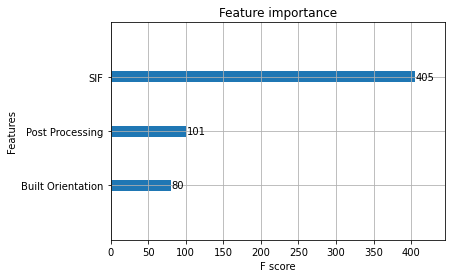

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
#reduction in mse
plot_importance(xgb_model)
plt.show()

The Best model for default parameters is XGB, Hence using Hyperparameter Optimization using Optuna for XGB Hyperparameters

In [ ]:
!pip install optuna

In [ ]:
import optuna
def xgb_objective(trial):
    param = {
        'silent': 1,
        'random_state': 0,
        'objective': 'reg:linear',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'n_estimators': trial.suggest_int('n_estimators',10,100),
        'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
        'max_depth':trial.suggest_int('max_depth',3,6)
    }
    bst = xgb.XGBRegressor(**param)
    bst.fit(x_train,y_train)
    return math.sqrt(mean_squared_error(y_test,bst.predict(x_test)))

In [ ]:
import math
SEED = 42
np.random.seed(SEED)
xgb_study = optuna.create_study(direction='minimize',sampler=optuna.samplers.TPESampler(seed=SEED),pruner=optuna.pruners.SuccessiveHalvingPruner())
xgb_study.optimize(xgb_objective, n_trials=100)

[I 2021-09-29 18:50:08,883] A new study created in memory with name: no-name-af12ebad-2e03-425c-a564-aea2614e07eb
[I 2021-09-29 18:50:08,903] Trial 0 finished with value: 0.9195407946843202 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.024810409748678097, 'reg_alpha': 0.00042079886696066364, 'n_estimators': 24, 'learning_rste': 0.00014936568554617635, 'max_depth': 6}. Best is trial 0 with value: 0.9195407946843202.
[I 2021-09-29 18:50:08,916] Trial 1 finished with value: 0.9176190473281284 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.7579479953348001, 'reg_alpha': 0.21368329072358744, 'n_estimators': 29, 'learning_rste': 0.0003511356313970409, 'max_depth': 3}. Best is trial 1 with value: 0.9176190473281284.
[I 2021-09-29 18:50:08,929] Trial 2 finished with value: 0.9090885775808338 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.0014618962793704966, 'reg_alpha': 0.0280163515871626, 'n_estimators': 22, 'learning_rste': 0.0007523742884534858, 'max_depth': 4}.

Importing required Libraries from Optuna

In [ ]:
from typing import Callable
from typing import Optional

import numpy as np

from optuna._experimental import experimental
from optuna.logging import get_logger
from optuna.study import Study
from optuna.study import StudyDirection
from optuna.trial import FrozenTrial
from optuna.trial import TrialState
from optuna.visualization._utils import _check_plot_args
from optuna.visualization.matplotlib._matplotlib_imports import _imports


if _imports.is_successful():
    from optuna.visualization.matplotlib._matplotlib_imports import Axes
    from optuna.visualization.matplotlib._matplotlib_imports import plt

_logger = get_logger(__name__)

User defined function to visualize the optimization History

In [ ]:
def optimization_history(
    study: Study,
    *,
    target: Optional[Callable[[FrozenTrial], float]] = None,
    target_name: str = "Objective Value",
) -> "Axes":
    """Plot optimization history of all trials in a study with Matplotlib.
    .. seealso::
        Please refer to :func:`optuna.visualization.plot_optimization_history` for an example.
    Example:
        The following code snippet shows how to plot optimization history.
        .. plot::
            import optuna
            def objective(trial):
                x = trial.suggest_float("x", -100, 100)
                y = trial.suggest_categorical("y", [-1, 0, 1])
                return x ** 2 + y
            sampler = optuna.samplers.TPESampler(seed=10)
            study = optuna.create_study(sampler=sampler)
            study.optimize(objective, n_trials=10)
            optuna.visualization.matplotlib.plot_optimization_history(study)
    Args:
        study:
            A :class:`~optuna.study.Study` object whose trials are plotted for their target values.
        target:
            A function to specify the value to display. If it is :obj:`None` and ``study`` is being
            used for single-objective optimization, the objective values are plotted.
            .. note::
                Specify this argument if ``study`` is being used for multi-objective optimization.
        target_name:
            Target's name to display on the axis label and the legend.
    Returns:
        A :class:`matplotlib.axes.Axes` object.
    Raises:
        :exc:`ValueError`:
            If ``target`` is :obj:`None` and ``study`` is being used for multi-objective
            optimization.
    """

    _imports.check()
    _check_plot_args(study, target, target_name)
    get_optimization_history_plot(study, target, target_name)
    return 0
def get_optimization_history_plot(
    study: Study,
    target: Optional[Callable[[FrozenTrial], float]],
    target_name: str,
) -> "Axes":

    # Set up the graph style.
    fig = plt.figure()
    plt.title("Optimization History Plot")
    plt.xlabel("#Trials")
    plt.ylabel(target_name)
    
    # Prepare data for plotting.
    trials = [t for t in study.trials if t.state == TrialState.COMPLETE]

    if len(trials) == 0:
        _logger.warning("Study instance does not contain trials.")
        return 0

    # Draw a scatter plot and a line plot.
    if target is None:
        if study.direction == StudyDirection.MINIMIZE:
            best_values = np.minimum.accumulate([t.value for t in trials])
        else:
            best_values = np.maximum.accumulate([t.value for t in trials])
        plt.scatter(
            x=[t.number for t in trials],
            y=[t.value for t in trials],
            color='blue',
            alpha=1,
            label=target_name,
        )
        plt.plot(
            [t.number for t in trials],
            best_values,
            marker="o",
            color='red',
            alpha=0.5,
            label="Best Value",
        )

        plt.legend()
    else:
        plt.scatter(
            x=[t.number for t in trials],
            y=[target(t) for t in trials],
            color='red',
            alpha=1,
            label=target_name,
        )
    plt.savefig('pd_opt_his.png',dpi = 1200,bbox_inches='tight')
    plt.show()

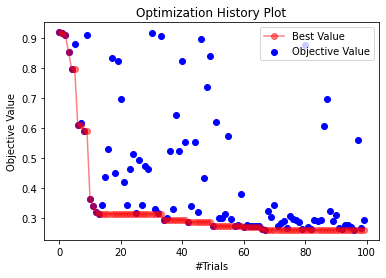

0

In [ ]:
optimization_history(xgb_study)

In [ ]:
#Best parameters in XGB Algorithm
xgb_study.best_params

{'booster': 'dart',
 'learning_rste': 0.08431999435293178,
 'max_depth': 3,
 'n_estimators': 96,
 'reg_alpha': 0.18831483356463694,
 'reg_lambda': 0.008820235477570784}

In [ ]:
bst_params = {'booster': 'dart',
 'learning_rste': 0.08431999435293178,
 'max_depth': 3,
 'n_estimators': 96,
 'reg_alpha': 0.18831483356463694,
 'reg_lambda': 0.008820235477570784}

In [ ]:
final_model = xgb.XGBRegressor(**bst_params)
final_model.fit(x_train,y_train)

[18:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1,
             learning_rste=0.08431999435293178, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=96, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.18831483356463694, reg_lambda=0.008820235477570784,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [ ]:
print(r2_score(y_test,final_model.predict(x_test)))
print(mean_absolute_error(y_test,final_model.predict(x_test)))
print(math.sqrt(mean_squared_error(y_test,final_model.predict(x_test))))

0.857187593693409
0.14455020996852147
0.2677313360802358


In [ ]:
print(r2_score(y_train,final_model.predict(x_train)))

0.91952381988758


In [ ]:
y_pred_final_xgb = final_model.predict(df_final[['Post Processing','Built Orientation','SIF']])
y_pred_final_xgb

array([-3.75597298e-01, -3.36258113e-01, -3.24179173e-01, -3.26598942e-01,
       -3.11009288e-01, -3.11009288e-01, -3.11009288e-01, -2.57676363e-01,
       -2.57676363e-01, -1.88036323e-01, -1.18353546e-01,  5.00689149e-02,
        9.51383471e-01, -4.28836226e-01, -4.28836226e-01, -4.18534577e-01,
       -4.14646804e-01, -3.95347059e-01, -3.95347059e-01, -3.04156482e-01,
       -3.20440114e-01, -3.16765308e-01, -3.68793130e-01, -2.87408173e-01,
       -2.87408173e-01, -2.87408173e-01, -2.87408173e-01, -2.60952592e-01,
        9.46607113e-01, -2.60952592e-01, -2.60952592e-01, -2.87408173e-01,
        5.28883338e-02,  5.28883338e-02,  3.49909872e-01,  2.88937569e-01,
        2.88937569e-01,  3.79667044e-01,  2.88937569e-01,  2.88937569e-01,
        1.20572877e+00,  1.30899835e+00,  2.53897023e+00,  2.23103619e+00,
        5.50201035e+00, -4.59580004e-01, -5.06022692e-01, -5.06022692e-01,
       -4.59580004e-01, -4.59580004e-01, -4.32838678e-01, -4.32838678e-01,
       -4.32838678e-01, -

In [ ]:
y_pred_final_xgb_list = list(y_pred_final_xgb)

In [ ]:
df_final['Pred'] = y_pred_final_xgb_list

Actual vs Predicted plots using optimized Hyperparameters in XGB Algorithm.

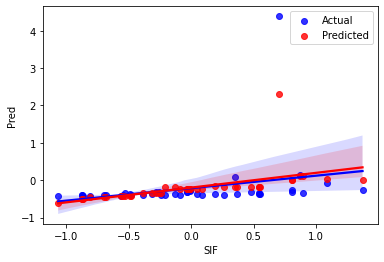

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 0) & (df_final['Built Orientation'] == 0)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

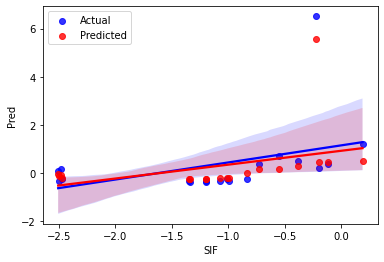

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 0) & (df_final['Built Orientation'] == 1)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

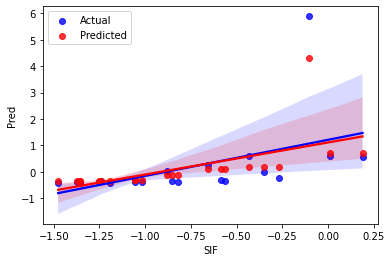

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 0) & (df_final['Built Orientation'] == 2)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

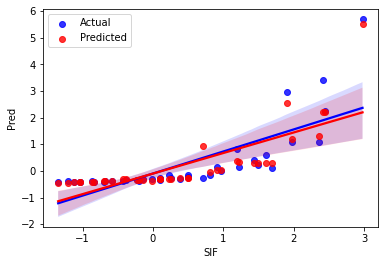

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 1) & (df_final['Built Orientation'] == 0)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

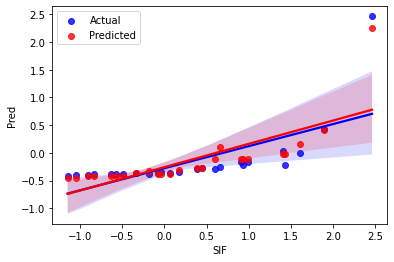

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 1) & (df_final['Built Orientation'] == 1)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

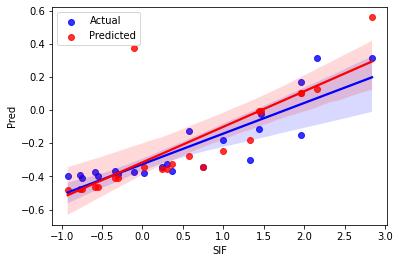

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 1) & (df_final['Built Orientation'] == 2)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

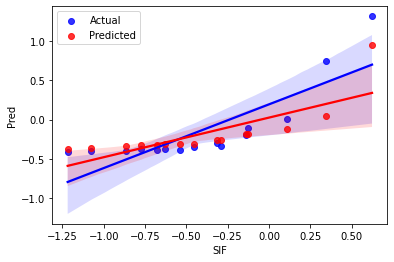

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 2) & (df_final['Built Orientation'] == 0)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

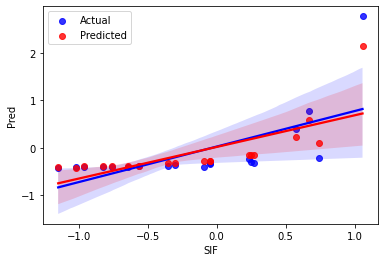

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 2) & (df_final['Built Orientation'] == 1)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

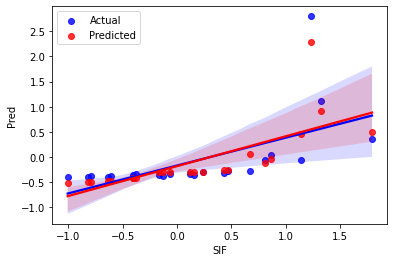

In [ ]:
df_0_0 = df_final[(df_final['Post Processing'] == 2) & (df_final['Built Orientation'] == 2)]
sns.regplot(df_0_0['SIF'],df_0_0['Crack Growth Rate'],color = 'b',label = 'Actual')
sns.regplot(df_0_0['SIF'],df_0_0['Pred'],color = 'r',label = 'Predicted')
plt.legend()

In [ ]:
R2_scores

[0.8437959825929984,
 0.7859630801684114,
 0.42957677196145205,
 0.7656317750013278]

In [ ]:
mse

[0.07840155438209671,
 0.10742890924648257,
 0.28630548993723093,
 0.11763355029334373]

In [ ]:
mae

[0.15294624192589806,
 0.1566235884705582,
 0.23946814747837178,
 0.17663536617896228]

In [ ]:
metrics = pd.DataFrame({'Algorithms' : ['XGB','RF','KNN','DT'],
    'R2_Scores' : R2_scores,
                        'mse' :mse,
                        'mae': mae})

In [ ]:
metrics1 = metrics.sort_values(by = 'R2_Scores', ascending = False)

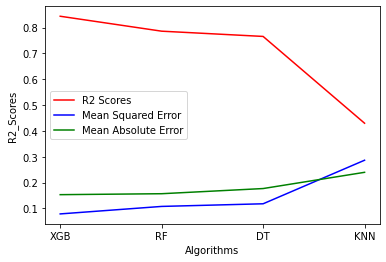

In [ ]:
sns.lineplot(data = metrics1, x = 'Algorithms', y = 'R2_Scores',color = 'r', label = 'R2 Scores')
sns.lineplot(data = metrics1, x = 'Algorithms', y = 'mse',color = 'b', label = 'Mean Squared Error')
sns.lineplot(data = metrics1, x = 'Algorithms', y = 'mae',color = 'g', label = 'Mean Absolute Error')
plt.legend()

Feature Importance using the Optimized Hyperparameters for XGB Algorithm.

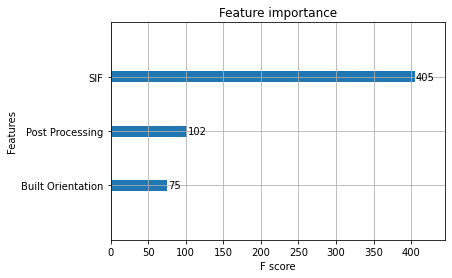

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
#reduction in mse
plot_importance(final_model)
plt.show()